**Logistic Regression**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('iris.csv')

df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# extract sepal length and sepal width of setosa and versicolor for our binary calssification problem
X = df.iloc[0:100, [1, 2]].values

y = df.iloc[0:100, 5].values
# set output lable value to 1 if it is setosa and 0 if versicolor.
y = np.where(y == 'Iris-setosa', 1, 0)

In [4]:
# features standerdization
X_std = np.copy(X)

X_std[:,0] = (X_std[:,0] - X_std[:,0].mean()) / X_std[:,0].std()
X_std[:,1] = (X_std[:,1] - X_std[:,1].mean()) / X_std[:,1].std()

In [5]:
# Define Logistic Regression hypothesis or sigmoid function

def sigmoid(X, theta):
    
    z = np.dot(X, theta[1:]) + theta[0]
    
    return 1.0 / ( 1.0 + np.exp(-z))

In [6]:
# Define Logistic Regression Cost Function
def lrCostFunction(y, hx):
  
    # compute cost for given theta parameters
    j = -y.dot(np.log(hx)) - ((1 - y).dot(np.log(1-hx)))
    
    return j

In [7]:
# Gradient Descent function to minimize the Logistic Regression Cost Function.
def lrGradient(X, y, theta, alpha, num_iter):
    # empty list to store the value of the cost function over number of iterations
    cost = []
    
    for i in range(num_iter):
        # call sigmoid function 
        hx = sigmoid(X, theta)
        # calculate error
        error = hx - y
        # calculate gradient
        grad = X.T.dot(error)
        # update values in theta
        theta[0] = theta[0] - alpha * error.sum()
        theta[1:] = theta[1:] - alpha * grad
        
        cost.append(lrCostFunction(y, hx))
        
    return cost        
        

In [8]:
# m = Number of training examples
# n = number of features
m, n = X.shape

# initialize theta(weights) parameters to zeros
theta = np.zeros(1+n)

# set learning rate to 0.01 and number of iterations to 500
alpha = 0.01
num_iter = 500

cost = lrGradient(X_std, y, theta, alpha, num_iter)

Text(0.5, 1.0, 'Logistic Regression')

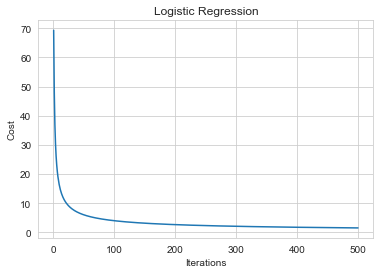

In [9]:
# Make a plot with number of iterations on the x-axis and the cost function on y-axis
plt.plot(range(1, len(cost) + 1), cost)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Logistic Regression')

In [10]:
# print theta paramters 
print ('\n Logisitc Regression bias(intercept) term :', theta[0])
print ('\n Logisitc Regression estimated coefficients :', theta[1:])


 Logisitc Regression bias(intercept) term : -0.9446651398200641

 Logisitc Regression estimated coefficients : [-6.34237524  4.55808974]


In [11]:
# function to predict the output label using the parameters
def lrPredict(X):
    
    return np.where(sigmoid(X,theta) >= 0.5, 1, 0)

In [12]:
from matplotlib.colors import ListedColormap

def plot_decision_boundry(X, y, classifier, h=0.02):
    # h = step size in the mesh
  
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, h),
                         np.arange(x2_min, x2_max, h))
    Z = classifier(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)
  

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


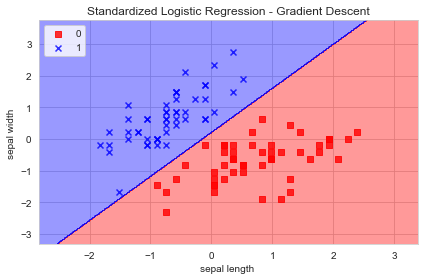

In [13]:
plot_decision_boundry(X_std, y, classifier=lrPredict)
plt.title('Standardized Logistic Regression - Gradient Descent')
plt.xlabel('sepal length ')
plt.ylabel('sepal width ')
plt.legend(loc='upper left')
plt.tight_layout()

In [14]:
from sklearn import linear_model

logreg = linear_model.LogisticRegression()

logreg.fit(X_std, y)

# print theta paramters 
print ('\n sklearn bias(intercept) term :', logreg.intercept_)
print ('\n sklearn estimated coefficients :', logreg.coef_)


 sklearn bias(intercept) term : [-0.2879227]

 sklearn estimated coefficients : [[-2.72500135  2.23666884]]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


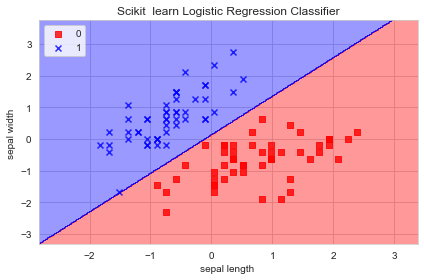

In [15]:
plot_decision_boundry(X_std, y, classifier=logreg.predict)
plt.title('Scikit  learn Logistic Regression Classifier')
plt.xlabel('sepal length ')
plt.ylabel('sepal width ')
plt.legend(loc='upper left')
plt.tight_layout()